In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

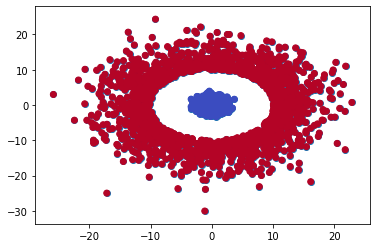

In [108]:
n = 5000
d = 2


x_0 = np.random.randn(n, d) + np.array([0,0]) 
x_1 = np.random.randn(n, d) + np.array([0,0])
x_1 = x_1*7
x_1 = x_1[np.sqrt(x_1[:,0]**2 + x_1[:,1]**2) >10]

x = np.vstack([x_0, x_1])

plt.scatter(x[:,0], x[:,1], cmap ='jet' )

y = np.array([0] * x_0.shape[0] + [1] * x_1.shape[0])


plt.scatter(x[:,0], x[:,1], c = y , cmap = 'coolwarm')
plt.show()

## Donut Neural Network of 2 linear regression


In [31]:
x_hole = np.random.randn(1000, 2)
x_nut = np.random.randn(2000, 2)*5

dist =np.sum(x_nut **2, axis = 1)
x_nut = x_nut[dist > 23]

y_hole = np.array([[0, 1]] * x_hole.shape[0])
y_nut = np.array([[1, 0]] * x_nut.shape[0])


x = np.vstack([x_hole, x_nut])
y = np.vstack([y_hole, y_nut])


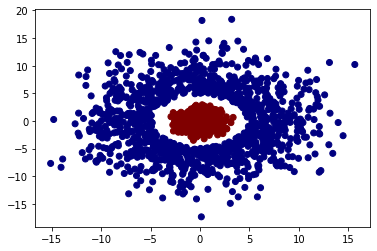

In [32]:
plt.scatter(x[:, 0], x[:, 1], c=np.argmax(y, axis =1), cmap = 'jet')

In [20]:
class Sigmoid:
    
    def __init__(self):
        pass
    
    def __call__(self, z):
        return 1 / (1 + np.exp(-z))
    
    def D(self, z):   ##D is for derivative    derivative of sigmoid z is z(1-z)
        return self(z) * (1 - self(z))   # here self calls the class fun and so self(z) is sigmoid(z)

def SoftMax(z):
    return np.exp(z) / (np.sum(np.exp(z), axis = 1, keepdims=True) + 1e-99)


def XLine(x):
    x_max  = np.max(x, axis = 0)
    x_min  = np.min(x, axis = 0)
    x_line = np.random.rand(10000, 2) * (x_max - x_min) + x_min
    return x_line        

In [27]:
#in this example we have 2 x's and 5 outputs 
z_size = 5 #no of hidden layers 


func = Sigmoid()
learn_rate = 1e-3

w_1 = np.random.randn(z_size, y.shape[1])
b_1 = np.random.randn(1, y.shape[1])

w_0 = np.random.randn(x.shape[1], z_size)
b_0 = np.random.randn(1, z_size)

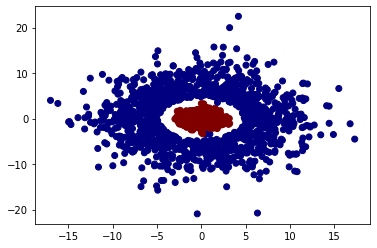

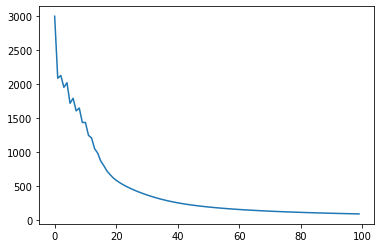

In [28]:
iterations = 100
losses = []

for i in range(iterations):
    z = func(x @ w_0 + b_0)           #p_hat and z from equations in notes
    p_hat = SoftMax(z @ w_1 + b_1)
    #gradient wrt w1
    grad_p_hat = p_hat - y  

    grad_w_1 = z.T @ grad_p_hat
    grad_b_1 = np.sum(grad_p_hat, axis = 0, keepdims = True)

    grad_w_0 = x.T @ (grad_p_hat @w_1.T * func.D(x @ w_0 + b_0))
    grad_b_0 = np.sum(grad_p_hat @w_1.T * func.D(x @ w_0 + b_0), axis = 0, keepdims = True)



    w_1 -= grad_w_1 * learn_rate
    b_1 -= grad_b_1 * learn_rate
    w_0 -= grad_w_0 * learn_rate
    b_0 -= grad_b_0 * learn_rate

    losses.append(-np.sum(y * np.log(p_hat+1e-99)))


plt.scatter(x[:,0], x[:,1], c=np.argmax(p_hat, axis =1), cmap ='jet' )
plt.show()
plt.plot(losses)

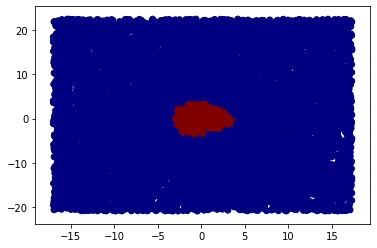

In [29]:
def XLine(x):
    x_max  = np.max(x, axis = 0)
    x_min  = np.min(x, axis = 0)
    x_line = np.random.rand(10000, 2) * (x_max - x_min) + x_min
    return x_line        
x_line = XLine(x)

z_line = func(x_line @ w_0 + b_0)

y_line = z_line @ w_1 + b_1

plt.scatter(x_line[:,0], x_line[:,1], c=np.argmax(y_line, axis =1), cmap ='jet')#, alpha = 0.2, s = 3)
plt.scatter(x[:,0], x[:,1], c=np.argmax(p_hat, axis =1), cmap ='jet')


## creating class funtion for two layer linear regression

In [60]:
class Sigmoid:
    
    def __init__(self):
        pass
    
    def __call__(self, z):
        return 1 / (1 + np.exp(-z))
    
    def D(self, z):   ##D is for derivative    derivative of sigmoid z is z(1-z)
        return self(z) * (1 - self(z))   # here self calls the class fun and so self(z) is sigmoid(z)

def SoftMax(z):
    return np.exp(z) / (np.sum(np.exp(z), axis = 1, keepdims=True) + 1e-99)


def XLine(x):
    x_max  = np.max(x, axis = 0)
    x_min  = np.min(x, axis = 0)
    x_line = np.random.rand(10000, 2) * (x_max - x_min) + x_min
    return x_line        

In [61]:
x_hole = np.random.randn(1000, 2)
x_nut = np.random.randn(2000, 2)*5

dist =np.sum(x_nut **2, axis = 1)
x_nut = x_nut[dist > 23]

y_hole = np.array([[0, 1]] * x_hole.shape[0])
y_nut = np.array([[1, 0]] * x_nut.shape[0])


x = np.vstack([x_hole, x_nut])
y = np.vstack([y_hole, y_nut])


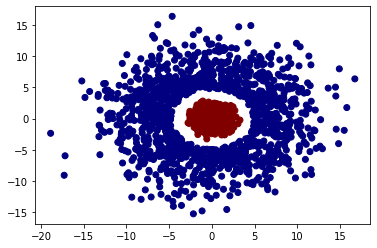

In [62]:
plt.scatter(x[:, 0], x[:, 1], c=np.argmax(y, axis =1), cmap = 'jet')

In [67]:
class TwoLayerLogReg:
    
    def __init__(self, size_in, size_out, size_hidden, activation_func = Sigmoid()):
        self.func = activation_func
        
        self.w_1 = np.random.randn(size_hidden, size_out)
        self.b_1 = np.random.randn(1, size_out)

        self.w_0 = np.random.randn(size_in, size_hidden)
        self.b_0 = np.random.randn(1, size_hidden)
        
    
    def fit(self, x, y, iterations = 100, learn_rate = 1e-3):
        
        losses = []

        for i in range(iterations):
            z = self.func(x @ self.w_0 + self.b_0)           #p_hat and z from equations in notes
            p_hat = SoftMax(z @ self.w_1 + self.b_1)
            #
            
            #gradient wrt w1
            grad_p_hat = p_hat - y  

            grad_w_1 = z.T @ grad_p_hat
            grad_b_1 = np.sum(grad_p_hat, axis = 0, keepdims = True)

            grad_w_0 = x.T @ (grad_p_hat @ self.w_1.T * self.func.D(x @ self.w_0 + self.b_0))
            grad_b_0 = np.sum(grad_p_hat @ self.w_1.T * self.func.D(x @ self.w_0 + self.b_0), axis = 0, keepdims = True)



            self.w_1 -= grad_w_1 * learn_rate
            self.b_1 -= grad_b_1 * learn_rate
            self.w_0 -= grad_w_0 * learn_rate
            self.b_0 -= grad_b_0 * learn_rate

            losses.append(-np.sum(y * np.log(p_hat+1e-99)))

    def predict(self, x):
            z = self.func(x @ self.w_0 + self.b_0)    
            p_hat = SoftMax(z @ self.w_1 + self.b_1)
            return p_hat

    def batch_fit():
        pass

In [69]:
model = TwoLayerLogReg(x.shape[1], y.shape[1], 5, Sigmoid())
model.fit(x,y)
p_hat = model.predict(x)

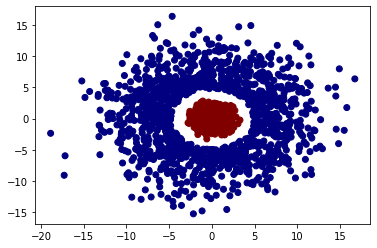

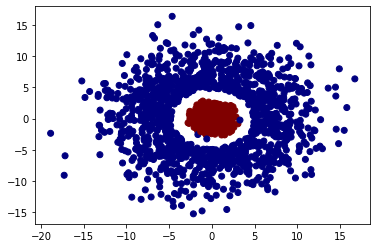

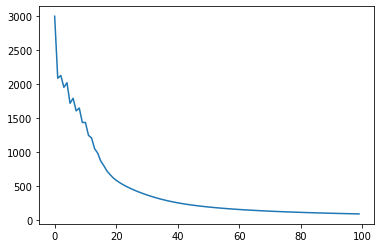

In [70]:
plt.scatter(x[:,0], x[:,1], c=np.argmax(y, axis =1), cmap ='jet' )
plt.show()
       
plt.scatter(x[:,0], x[:,1], c=np.argmax(p_hat, axis =1), cmap ='jet' )
plt.show()
plt.plot(losses)

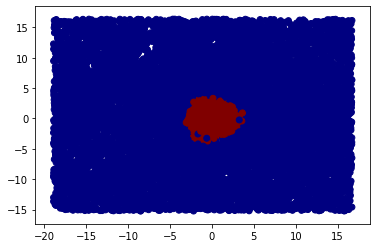

In [71]:
x_line = XLine(x)

z_line = func(x_line @ w_0 + b_0)

y_line = z_line @ w_1 + b_1

plt.scatter(x_line[:,0], x_line[:,1], c=np.argmax(y_line, axis =1), cmap ='jet')#, alpha = 0.2, s = 3)
plt.scatter(x[:,0], x[:,1], c=np.argmax(p_hat, axis =1), cmap ='jet')
